# Music Recommender System

Music recommender system is a system which learns from the user’s past listening
history and recommends them songs which they would probably like to hear in future.

According to Nielsen’s Music 360 2014 study, 93% of the U.S. population listens
to music, spending more than 25 hours each week jamming out to their favorite tunes. Recommender systems have taken the entertainment and e-commerce industries
by storm. Amazon, Netflix, and Spotify are great examples. 

In this project, we will design, implemented and analyzed song
recommendation systems using various algorithms. Music recommendation is a very
difficult problem as we have to structure music in a way that we recommend the favorite
songs to users which is never a definite prediction. 

We have used **Million Song Dataset** , a freely-available collection of audio features and metadata for a million
contemporary popular music tracks provided by Echo Nest, to find the correlations
between users and songs and to learn from the previous listening history of users to
provide recommendations for songs which users would prefer to listen most. We will
discuss the problems we faced, methods we have implemented, results and analysis. 

In [ ]:
#Importing Libraries
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import io
#Loading the dataset
df1 = pd.read_csv('kaggle_visible_evaluation_triplets.txt', sep='\t', names=['user_id','song_id','freq'])

In [ ]:
df1.head()

,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [ ]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,1450933,110000,7d90be8dfdbde170f036ce8a4b915440137cb11c,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
song_id,1450933,163206,SOFRQTD12A81C233C0,5043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1.45093e+06,NaN,NaN,NaN,3.18715,7.05166,1,1,1,3,923


The dataset have **1450933** entries.

In [ ]:
df1.shape[0]

1450933

In [ ]:
#loading 2nd dataset
df2=pd.read_csv('unique_tracks.txt',sep='<SEP>', names=['track_id','song_id','artist','release'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [ ]:
df2.shape[0]

1000000

Unique_tracks have **1000000** entries.

In [ ]:
df2.describe(include='all').T

,count,unique,top,freq
track_id,1000000,1000000,TRTOPWZ128F92D0808,1
song_id,1000000,999056,SONNPCF12A6701E0A6,3
artist,1000000,72665,Michael Jackson,194
release,999985,702000,Intro,1511


We can see that **Michael Jackson** is the popupler artist. **Intro** is the populer released album.

In [ ]:
# Merging both dataset
df=pd.merge(df1, right=df2,on='song_id')

In [ ]:
df.head()

,user_id,song_id,freq,track_id,artist,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
2,c5006d9f41f68ccccbf5ee29212b6af494110c5e,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
3,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,SOBONKR12A58A7A7E0,2,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
4,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,SOBONKR12A58A7A7E0,4,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One


In [ ]:
df.shape

(1491952, 6)

In [ ]:
df.drop(['track_id'], axis=1, inplace= True)

In [ ]:
df.isnull().sum()

user_id    0
song_id    0
freq       0
artist     0
release    1
dtype: int64

In [ ]:
df.shape

(1491952, 5)

In [ ]:
df.dropna(inplace=True) #Dropping missing value

In [ ]:
df.shape

(1491951, 5)

In [ ]:
df.isnull().sum()

user_id    0
song_id    0
freq       0
artist     0
release    0
dtype: int64

In [ ]:
df.duplicated().sum() #Looking for duplicate value

35387

In [ ]:
new=df[['user_id','freq']]
user=new.groupby(['user_id'])
user.head()

,user_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,1
1,c34670d9c1718361feb93068a853cead3c95b76a,1
2,c5006d9f41f68ccccbf5ee29212b6af494110c5e,1
3,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,2
4,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,4
...,...,...
1491907,38c4ef9248645425f9ec92ac370c623345410d8a,1
1491908,38c4ef9248645425f9ec92ac370c623345410d8a,1
1491909,38c4ef9248645425f9ec92ac370c623345410d8a,1
1491917,1c9af68a6bd59ddf5bf6b6e7e53243aeb63d9f3b,1


In [ ]:
print(df.freq.value_counts()*100/df.freq.value_counts().sum())
print('How many unique songs ',len(df.song_id.unique())) 

1      57.800357
2      14.770525
3       6.625218
5       5.032471
4       3.820233
         ...    
264     0.000067
262     0.000067
259     0.000067
189     0.000067
923     0.000067
Name: freq, Length: 299, dtype: float64
How many unique songs  163205


We see there are 57% unique songs.

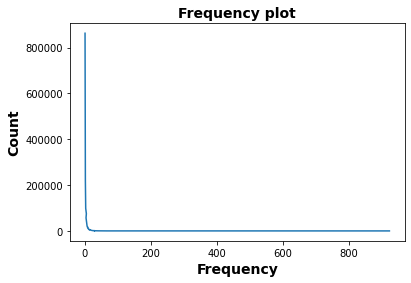

In [ ]:
df.freq.value_counts().plot()
plt.title('Frequency plot',fontsize=14, fontweight='bold')
plt.xlabel('Frequency',fontsize=14, fontweight='bold')
plt.ylabel('Count',fontsize=14, fontweight='bold');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


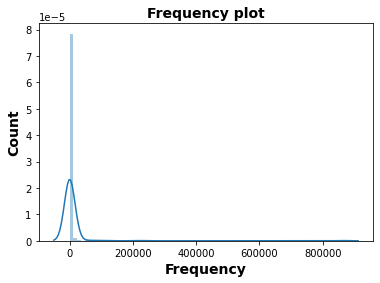

In [ ]:
sns.distplot(df.freq.value_counts(),bins=70)
plt.title('Frequency plot',fontsize=14, fontweight='bold')
plt.xlabel('Frequency',fontsize=14, fontweight='bold')
plt.ylabel('Count',fontsize=14, fontweight='bold');

In [ ]:
#Which songs are getting repeated
songs=df[['song_id','freq']]
repeats=songs[songs.freq==1]
song_repeats=repeats.groupby('song_id',as_index=False).count()
song_repeats.columns=['song_id','count']

In [ ]:
print("Top 20 songs repeated")
repeats.song_id.value_counts()[:20]

Top 20 songs repeated


SOFRQTD12A81C233C0    2149
SOWCKVR12A8C142411    2040
SOAXGDH12A8C13F8A1    1693
SODGVGW12AC9075A8D    1616
SOAUWYT12A81C206F1    1597
SONYKOW12AB01849C9    1517
SOSXLTC12AF72A7F54    1516
SOBONKR12A58A7A7E0    1441
SOEGIYH12A6D4FC0E3    1439
SOPXKYD12A6D4FA876    1390
SOLFXKT12AB017E3E0    1380
SOFLJQZ12A6D4FADA6    1371
SODJWHY12A8C142CCE    1314
SOTWSXL12A8C143349    1280
SOUVTSM12AC468F6A7    1200
SOUSMXX12AB0185C24    1158
SOULTKQ12AB018A183    1118
SOIZLKI12A6D4F7B61    1032
SOTWNDJ12A8C143984    1006
SONIQRE12AF72A2B02    1006
Name: song_id, dtype: int64

Top 20 repeated songs, means those shongs are popular also.

In [ ]:
song_repeats=pd.DataFrame(song_repeats).merge(df,left_on='song_id',right_on='song_id')

In [ ]:
song_repeats.head()

,song_id,count,user_id,freq,artist,release
0,SOAAAFI12A6D4F9C66,2,d075a43b518c724d8498db70b623eda22cfd2f45,1,I Love You But I've Chosen Darkness,The Less You See
1,SOAAAFI12A6D4F9C66,2,1efc7ed552aa1714673bafef07b3550eeaa18535,1,I Love You But I've Chosen Darkness,The Less You See
2,SOAAAGQ12A8C1420C8,20,4e0a4bcaa5b34b553e61cb6d795ec79d152d4c22,2,Bohren & Der Club Of Gore,Orgelblut
3,SOAAAGQ12A8C1420C8,20,4cb11395f7fafab07d0a3ac29cdfd606b467bf9c,4,Bohren & Der Club Of Gore,Orgelblut
4,SOAAAGQ12A8C1420C8,20,0b91b7ba26eea486bcc6aee4e345cbbfe308c4a0,1,Bohren & Der Club Of Gore,Orgelblut


In [ ]:
song_repeats.isnull().sum()

song_id    0
count      0
user_id    0
freq       0
artist     0
release    0
dtype: int64

===================================================================================================================

===================================================================================================================

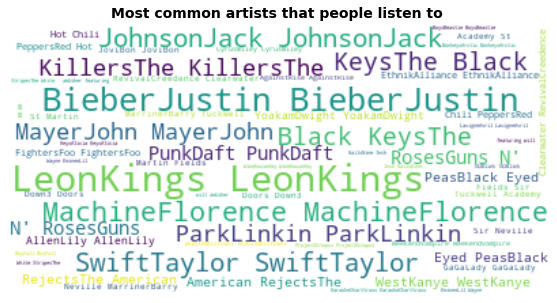

In [ ]:
#Artisits of most common songs
import matplotlib.pyplot as plt    
from wordcloud import WordCloud

def displaywc(txt,title):
    txt=""
    for i in g:
        txt+=str(i)
    wordcloud = WordCloud(background_color='white').generate(txt)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title,fontsize=14, fontweight='bold')
    plt.show()

g=song_repeats.artist.tolist()
txt=""
for i in g:
    txt+=str(i)
displaywc(txt,'Most common artists that people listen to ')

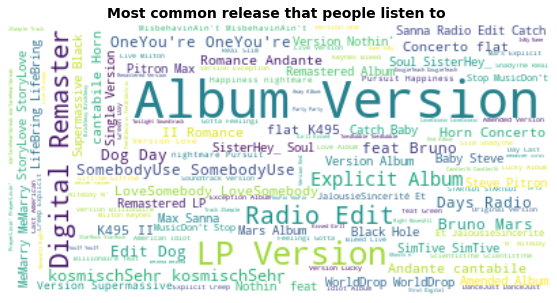

In [ ]:
# Most common releases like to listen by users
g=song_repeats.release.tolist()
txt=""
for i in g:
    txt+=str(i)
displaywc(txt,'Most common release that people listen to ')

In [ ]:
print('Users that listen to the same song again and again')
song_repeats.user_id.value_counts()[:20]

Users that listen to the same song again and again


ad4b2717e89766b66b96fe52a38736116e315874    57
316110734d8da7478cc33237458814f770a9eb7a    56
9b0f827c8bad0cf089b0d778307e1b390f463730    54
0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90    54
70060f2eba3f2486a7a147546adf4e6b1660e295    53
3233c598c50f0ddbd351504e773cd51de79691db    53
03ad93fdb01506ce205f4708decf8e4b1ae90fff    53
a251b1ac6982e1a3abeb09f90f41a671c76dfcad    52
016a24e91a72c159a5048ab1b9b2ba5ce761b526    52
992fea335363e87217e1b052fd7380b3fd7e35b4    51
cff21116daa6af7719ed41e4b540feeaf5f31803    51
4759c3e074d8a6d1caeab6ca4a88c06384d42748    51
2e424b28bff1f62a2dae22a918f09f9c30c06d1b    51
0c210254fc2eaf598f3a1b68212d4202d91a9935    51
cdf02034d8a63dd8f4b4c22a5e7b225a37bdb844    51
fd94f121ddfa8521f2348cb9863f0a7b475b7690    50
ca885bed5d391ccc0fda84e8eb4441e005f68bcd    50
dfadfaa39598cf760125439346d903ea0467e7fa    50
c77574174ffe7118d90ac95c6671ff840858806a    50
e99ef008f893efd071a7a77be6f1e8d23b962278    50
Name: user_id, dtype: int64

In [ ]:
song_repeats.artist.value_counts().to_frame()[:10]

,artist
Coldplay,13674
Kings Of Leon,11586
Justin Bieber,9259
Florence + The Machine,8213
Eminem,8157
Muse,7915
Jack Johnson,7462
Taylor Swift,7435
Train,6612
The Black Keys,6507


We found that users are most like to listen **Coldplay** songs.

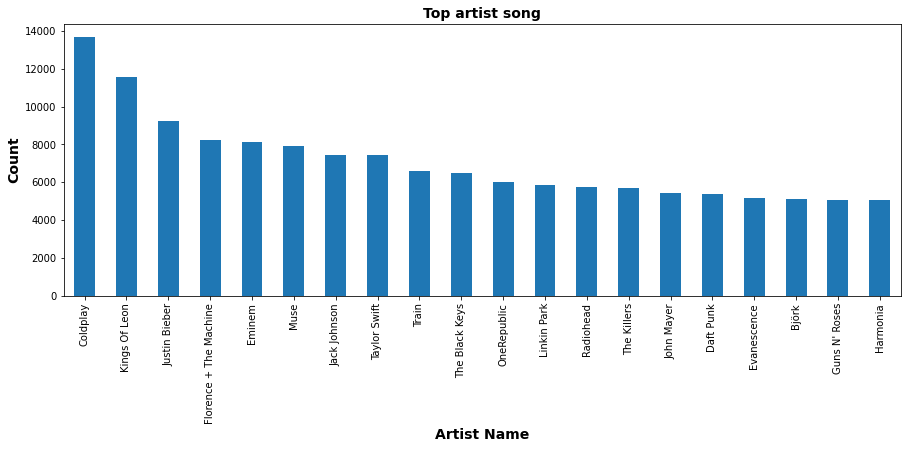

In [ ]:
#top artist song
plt.figure(figsize=(15,5))
song_repeats.artist.value_counts()[:20].plot(kind='bar')
plt.title('Top artist song',fontsize=14, fontweight='bold')

plt.xlabel('Artist Name',fontsize=14, fontweight='bold')
plt.ylabel('Count',fontsize=14, fontweight='bold');

In [ ]:
song_repeats.release.value_counts()[:10].to_frame()

,release
Sehr kosmisch,5043
Undo,4483
You're The One,4265
Use Somebody,3822
Dog Days Are Over (Radio Edit),3780
Revelry,3672
Secrets,3453
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile),3272
Somebody To Love,3262
Hey_ Soul Sister,2791


We found that **Sehr kosmisch** track is most listened trach by the users.

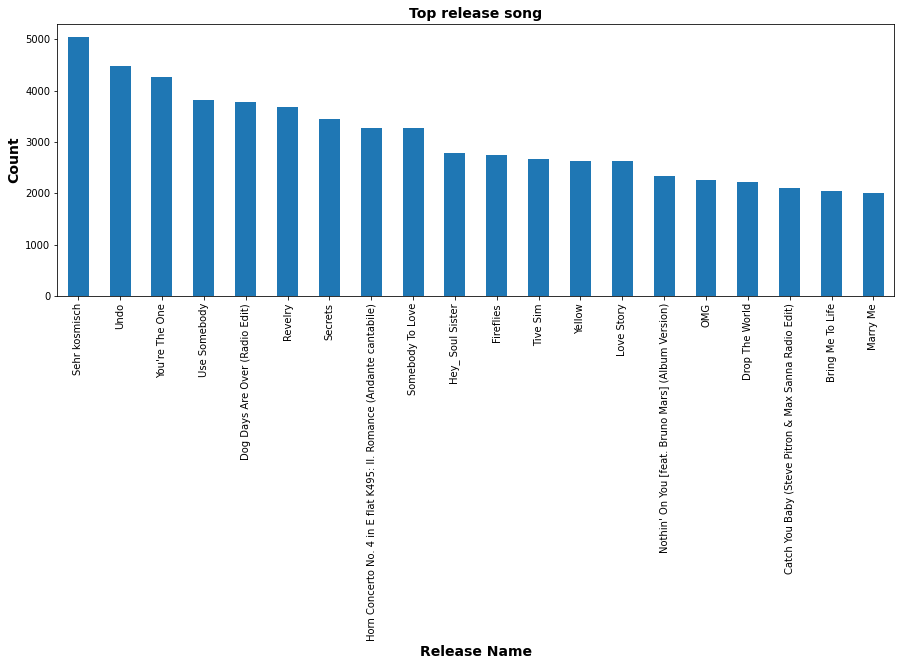

In [ ]:
#top release song
plt.figure(figsize=(15,5))
song_repeats.release.value_counts()[:20].plot(kind='bar')
plt.title('Top release song',
fontsize=14, fontweight='bold')

plt.xlabel('Release Name',fontsize=14, fontweight='bold')
plt.ylabel('Count',fontsize=14, fontweight='bold');

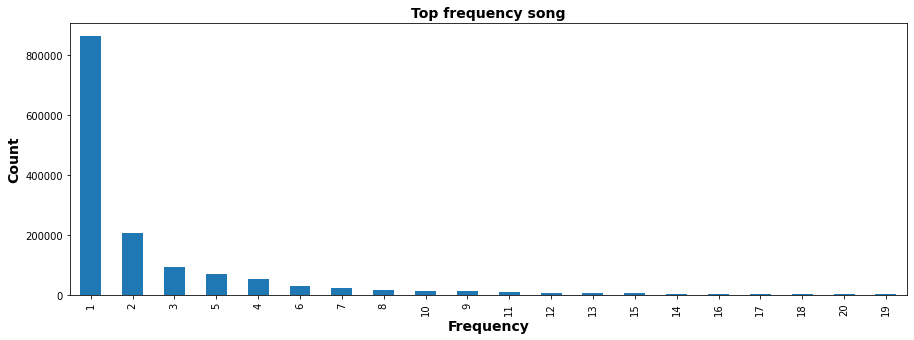

In [ ]:
#top frequency song
plt.figure(figsize=(15,5))
song_repeats.freq.value_counts()[:20].plot(kind='bar')
plt.title('Top frequency song',fontsize=14, fontweight='bold')

plt.xlabel('Frequency', fontsize=14, fontweight='bold')
plt.ylabel('Count',fontsize=14, fontweight='bold');

We derived from this plot that,very few songs gain the populartity .

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


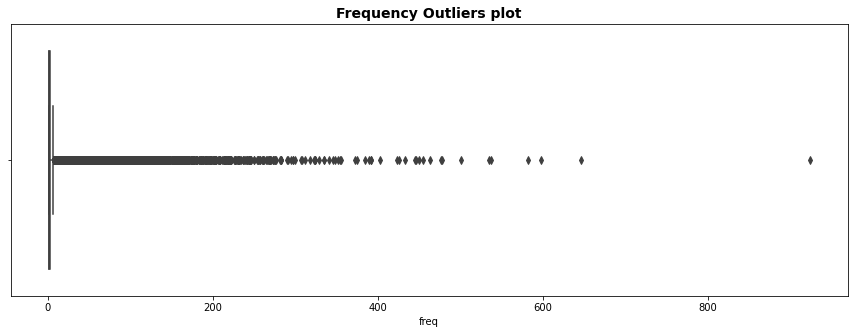

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(df['freq'])
plt.title('Frequency Outliers plot',fontsize=14, fontweight='bold');

The merged dataset have some outliers. But that beacuse of the most polpular artist's song and the fan followers. 

In [ ]:
artist_freq = df.groupby('artist')['freq'].sum().reset_index().sort_values(by='freq', ascending=False)[:10]
artist_freq

,artist,freq
13611,Kings Of Leon,43775
5085,Coldplay,36203
7436,Dwight Yoakam,35688
2855,Björk,35210
12965,Justin Bieber,31295
8801,Florence + The Machine,28224
7969,Eminem,22914
17319,Muse,22645
23560,Taylor Swift,21844
950,Alliance Ethnik,21603


We found that **King Of Leon** is most popular artist.

In [ ]:
Song_freq = df.groupby('song_id')['freq'].sum().reset_index().sort_values(by='freq', ascending=False)[:10]
Song_freq

,song_id,freq
10546,SOBONKR12A58A7A7E0,35432
5478,SOAUWYT12A81C206F1,33179
121599,SOSXLTC12AF72A7F54,24359
38185,SOFRQTD12A81C233C0,19454
28684,SOEGIYH12A6D4FC0E3,17115
6096,SOAXGDH12A8C13F8A1,14279
91409,SONYKOW12AB01849C9,12392
134757,SOVDSJC12A58A7A271,11610
140446,SOWCKVR12A8C142411,10926
129404,SOUFTBI12AB0183F65,10794


We found that song_id **SOBONKR12A58A7A7E0** is the most Pupolar songs and also played maximum times.

### Conclusion

We found different insigts from Exploratory Data Analysis. Now based on that we will try to build our Recommender System.